In [1]:
import os, sys
sys.path.append('./basic')
os.getcwd()
#os.chdir('..')
#from data_exploration import *

'C:\\Users\\u0752374\\projects\\MADE_relations'

In [2]:
import pickle
with open('./data/training_documents_and_relations.pkl', 'rb') as f:
    docs, relations = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './data/training_documents_and_relations.pkl'

In [6]:
os.listdir('./data')

['.ipynb_checkpoints',
 'all_gold_data',
 'annotated_document.txt',
 'edge_counts.pkl',
 'full_heldout_xmls',
 'generated_train.pkl',
 'heldout_xmls',
 'kelly_prediction',
 'kelly_test',
 'kelly_train',
 'NER_predictions_on_all_gold',
 'NER_predictions_on_all_gold.zip',
 'string_train.txt',
 'vocab.pkl']

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
for key, edges in relation_types.items():
    print(key, set(edges))

manner/route {'Drug => Route', 'Route => Route'}
reason {'Drug => Indication', 'Indication => Indication'}
severity_type {'ADE => Severity', 'SSLIF => Severity', 'Severity => Severity', 'Indication => Severity'}
do {'Drug => Dose', 'Dose => Dose'}
fr {'Frequency => Frequency', 'Drug => Frequency'}
du {'Drug => Duration', 'Duration => Duration'}
adverse {'Drug => ADE', 'SSLIF => ADE', 'ADE => ADE'}


In [18]:
# {do: {
#   'Drug => Dose': 5150,
#    'Dose => Drug': 27
#}}
type_dists = {}
for key, edges in relation_types.items():
    type_dists[key] = defaultdict(int)
    for edge in edges:
        type_dists[key][edge] += 1

In [19]:
type_dists

{'adverse': defaultdict(int,
             {'ADE => ADE': 23, 'Drug => ADE': 2055, 'SSLIF => ADE': 4}),
 'do': defaultdict(int, {'Dose => Dose': 27, 'Drug => Dose': 5150}),
 'du': defaultdict(int, {'Drug => Duration': 901, 'Duration => Duration': 5}),
 'fr': defaultdict(int,
             {'Drug => Frequency': 4407, 'Frequency => Frequency': 12}),
 'manner/route': defaultdict(int,
             {'Drug => Route': 2544, 'Route => Route': 7}),
 'reason': defaultdict(int,
             {'Drug => Indication': 4530, 'Indication => Indication': 24}),
 'severity_type': defaultdict(int,
             {'ADE => Severity': 282,
              'Indication => Severity': 269,
              'SSLIF => Severity': 2909,
              'Severity => Severity': 16})}

In [20]:
types = sorted(relation_types.keys(), key=lambda x:len(relation_types[x]), reverse=True)
types = [(t, len(relation_types[t])) for t in types]
types

[('do', 5177),
 ('reason', 4554),
 ('fr', 4419),
 ('severity_type', 3476),
 ('manner/route', 2551),
 ('adverse', 2082),
 ('du', 906)]

In [7]:
types = [('do', 5177),
 ('reason', 4554),
 ('fr', 4419),
 ('severity_type', 3476),
 ('manner/route', 2551),
 ('adverse', 2082),
 ('du', 906)]

In [8]:
# Plot distribution of edge types
#x, y = zip(*sorted(type_to_type_edges.items(), key=lambda x:x[1], reverse=True))
x, y = zip(*types)
#plt.xticks(labels)
#plt.xlabel(labels, rotation="vertical")
labels = [name if i % 1 ==0 else '' for (i, name) in enumerate(x)]

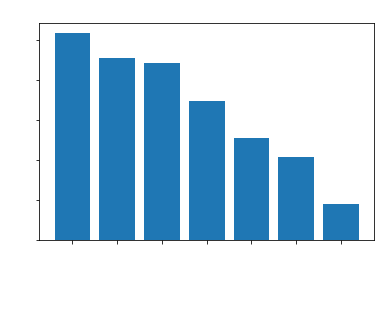

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.bar(range(len(x)), y, )
plt.xticks(range(len(x)), labels, rotation=45) 
#plt.xlabel("Type of relation")
#plt.ylabel("# relations")
_= plt.title("Distribution of Relation Types in MADE Challenge")

ax.set_title('Distribution of Relation Types in MADE Task 2', color='white')
#ax.set_xlabel("Type of relation", color="white")
#ax.set_ylabel("# relations in training data", color="white")
ax.set_xticklabels(labels, color="white")
_ = ax.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000], color="white")
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_yticks(range(len(x)))

In [51]:
plt.savefig('data_exploration_results/full_image.png')

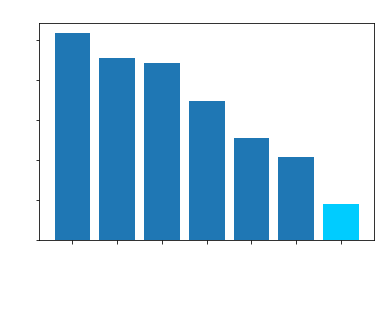

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

cols = ['#1f77b4',  '#1f77b4', '#1f77b4', '#1f77b4',  '#1f77b4', '#1f77b4','#00ccff', ]
ax.bar(range(len(x)), y, color=cols)

plt.xticks(range(len(x)), labels, rotation=45) 

_= plt.title("Distribution of Relation Types in MADE Challenge")

ax.set_title('Distribution of Relation Types in MADE Task 2', color='white')

ax.set_xticklabels(labels, color="white")
_ = ax.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000], color="white")


In [39]:
plt.savefig('relation_types_dist.png')

In [24]:
import random
import re

def print_relation_examples(relation_type, docs, thresh=100):
    doc_names = list(docs.keys())
    random.shuffle(doc_names)
    examples = []
    count = 0
    for filename in doc_names:
        doc = docs[filename]
        for relation in doc.relations:
            if relation.type == relation_type:
                examples.append((doc, relation))
                
    
    strings = []   
    i = 0
    random.shuffle(examples)
    for doc, relation in examples[:thresh]:
        i += 1
        first_span = relation.annotation_1.span
        second_span = relation.annotation_2.span
        sorted_entities = sorted((relation.annotation_1, relation.annotation_2), key=lambda x:x.span[0])
        entity1, entity2 = sorted_entities
        start, end = relation.span
        string = ''
        string += doc.text[start -40 : start]
        string += '<{}>'.format(relation_type.upper())
        string += '<{}>'.format(entity1.type.upper())
        string += entity1.text
        string += '</{}>'.format(entity1.type.upper())
        string += doc.text[entity1.span[1]:entity2.span[0]]
        string += '<{}>'.format(entity2.type.upper())
        string += entity2.text
        string += '</{}>'.format(entity2.type.upper())
        string += '</{}>\n\n'.format(relation_type.upper())
        string += doc.text[end: end+40]
        #print(string)
        string = re.sub('\n', ' ', string)
        string = re.sub('\t', ' ', string)
        string = re.sub('  ', ' ', string)
        strings.append(string)
    return strings
    
    
    
examples = print_relation_examples('do', docs)

In [25]:
examples[30]

' Care Unit.   CURRENT THERAPY:  1. <DO><DRUG>Thalidomide</DRUG> <DOSE>50 mg</DOSE></DO>  a day.  2. Prednisone 10 mg twice a w'

In [26]:
for relation in relation_types.keys():
    outpath = 'data_exploration_results/{}_examples.txt'.format(re.sub('/', '_', relation))
    examples = print_relation_examples(relation, docs)
    #print(examples[:5])
    #print()
    with open(outpath, 'w') as f:
        f.write('\n\n'.join(examples))

In [27]:
## Find some specific examples of the most common relation, ('Drug', 'Dose')
drug_doses = {}

for filename, doc in docs.items():
    if len(drug_doses) >= 25:
        break
    for relation in doc.relations:
        if relation.entity_types == ('Drug', 'Dose'):
            drug_doses[doc] = relation
            continue
            
    
        
    

In [28]:
for doc, relation in list(drug_doses.items())[:25]:
    start, end = relation.span
    print(doc.text[start - 10: end + 10])

es daily, ciprofloxacin 500 mg daily in 
oximately 10 mL of 2% lidocaine was then 
r nausea, ambien 5mg po qhs pr
r off his steroids by 10 mg every 2 weeks, he continues on 20mg every oth
a day and valacyclovir 500 mg p.o. t.i.
ed p.o.  
vancomycin 125 mg 4 times d
is taking Rapamune 5.5 mg every Mon
ntinue on omeprazole 20 mg p.o. dail
r day and Rapamune 0.5 mg twice a w
h will be high-dose methotrexate and cytarabine in the ea
esthesia: Lidocaine 1%;  mL subc
g off his steroids.  He is going to be taking 20 mg every other day alternating with 10 mg every oth
00 units, Noxafil 200 mg, magnesiu
1 dose of Rituxan at 500 mg/m2 today.  

 received 2 doses of rituximab along wit
 PO Qday, Oxycodone-Acetaminophen 5-325 mg PO Q 4-6 
cations  
levothyroxine -Synthroid- 150 mcg Tablet, Ordered By: --- Name ---  --- Name ---  
Directions: 1 tablet oral DAIL
s to take gabapentin 200 mg twice a d
e current dapsone tablets,  he will
s daily  
dexamethasone 4 mg Tablet, Ordered By: --- Name --- ---

In [89]:
def overlaps(span, other):
    if (
        # If this start is in between the other span
        other[0] <= span[0] < other[1] or
        # If this end is in between the other span
        other[0] <= span[1] < other[1] or
        # If the other start is between this span
        span[0] <= other[0] <= span[1] or
        # If the other end is within this tag
        span[0] <= other[1] <= span[1]
    ):
        return True

    return False
overlapping = []
doc_annotations = defaultdict(dict) # {document: annotation_span: annotation}

for rpt_id, doc in docs.items():
    for anno in doc.get_annotations():
        span = anno.span
        if span in doc_annotations[rpt_id]:
            overlapping.append((anno, doc_annotations[rpt_id]))
            continue
        for other_span, other_anno in doc_annotations[rpt_id].items():
            if overlaps(other_span, span):
                overlapping.append((anno, other_anno))
        

In [90]:
overlapping

[]

In [30]:
# What is the distribution of spans for the different classes?
relation_spans = defaultdict(list)
relation_names = relation_types.keys()

for filename, doc in docs.items():
    for relation in doc.relations:
        relation_spans[relation.type].append(relation.span[1] - relation.span[0])

    
relation_spans

defaultdict(list,
            {'adverse': [39,
              288,
              129,
              48,
              53,
              159,
              42,
              91,
              77,
              57,
              120,
              61,
              42,
              46,
              254,
              201,
              2309,
              2367,
              41,
              30,
              98,
              85,
              51,
              61,
              82,
              3091,
              371,
              356,
              249,
              277,
              66,
              87,
              118,
              41,
              148,
              135,
              110,
              591,
              92,
              105,
              78,
              91,
              63,
              76,
              135,
              160,
              208,
              122,
              109,
              84,
              565,
              243,
      

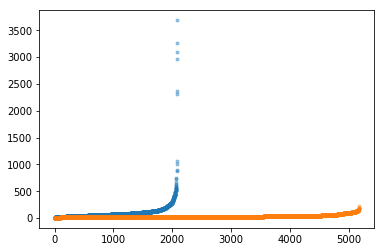

In [31]:
plt.plot(range(len(sorted(relation_spans['adverse']))), sorted(relation_spans['adverse']),
        marker='.', linestyle='none', alpha=0.4)
plt.plot(range(len(sorted(relation_spans['do']))), sorted(relation_spans['do']),
        marker='.', linestyle='none', alpha=0.4)

---do---
Max span length: 229
Min span length: 3
Mean span length: 29.67007919644582
Standard Devation span length: 23.77363506932444
---fr---
Max span length: 225
Min span length: 5
Mean span length: 46.18397827562797
Standard Devation span length: 32.64282567138077
---manner/route---
Max span length: 235
Min span length: 4
Mean span length: 35.55233241865935
Standard Devation span length: 27.830834981776473
---du---
Max span length: 287
Min span length: 6
Mean span length: 39.57064017660044
Standard Devation span length: 29.392487120838766


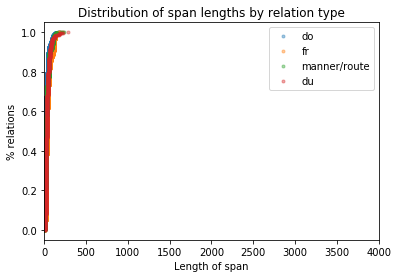

In [46]:
import numpy as np
def plot_spans_ecdf(relation_spans, types,):
    for relation_type in types:
        spans = relation_spans[relation_type]
        y = [num/len(spans) for num in range(len(spans))]
        x = sorted(spans)
        plt.plot(x, y, marker='.', linestyle='none', alpha=0.4)
        plt.xlim((0, 4000))
        plt.title("Distribution of span lengths by relation type")
        print("---{}---".format(relation_type))
        print("Max span length: {}".format(max(x)))
        print("Min span length: {}".format(min(x)))
        print("Mean span length: {}".format(np.mean(x)))
        print("Standard Devation span length: {}".format(np.std(x)))
    plt.ylabel('% relations')
    plt.xlabel('Length of span')
    plt.legend(types)
    plt.show()
    
plot_spans_ecdf(relation_spans, ["do", "fr", "manner/route", "du"])
#plot_spans_ecdf(relation_spans, ["reason", "severity_type", "adverse"])

In [136]:
relation_spans.keys()

dict_keys(['manner/route', 'reason', 'severity_type', 'do', 'fr', 'du', 'adverse', <class 'type'>])

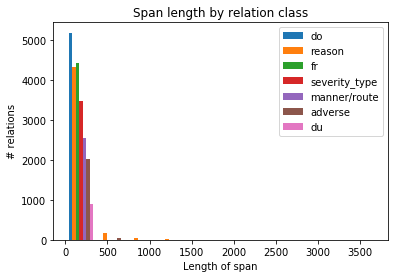

---do---
Max span length: 229
Min span length: 3
Mean span length: 29.67007919644582
Standard Devation span length: 23.77363506932444
---reason---
Max span length: 2777
Min span length: 3
Mean span length: 127.69367588932806
Standard Devation span length: 176.05863228528833
---fr---
Max span length: 225
Min span length: 5
Mean span length: 46.18397827562797
Standard Devation span length: 32.64282567138077
---severity_type---
Max span length: 1873
Min span length: 4
Mean span length: 30.95886075949367
Standard Devation span length: 36.504484950303585
---manner/route---
Max span length: 235
Min span length: 4
Mean span length: 35.55233241865935
Standard Devation span length: 27.83083498177647
---adverse---
Max span length: 3686
Min span length: 4
Mean span length: 105.05715658021134
Standard Devation span length: 181.2484167321182
---du---
Max span length: 287
Min span length: 6
Mean span length: 39.57064017660044
Standard Devation span length: 29.392487120838766


In [169]:
import numpy as np
def hist_spans_ecdf(relation_spans, types, xlim=None, ylim=None):
    x = [relation_spans[relation_type] for relation_type in types]
    if xlim:
        plt.xlim((0, xlim))
    if ylim:
        plt.ylim((0, ylim))
    plt.title("Span length by relation class")
    plt.ylabel('# relations')
    plt.xlabel('Length of span')
    plt.hist(x)
    plt.legend(types)
    plt.show()
    
    for relation_type in types:
    
        print("---{}---".format(relation_type))
        print("Max span length: {}".format(max(relation_spans[relation_type])))
        print("Min span length: {}".format(min(relation_spans[relation_type])))
        print("Mean span length: {}".format(np.mean(relation_spans[relation_type])))
        print("Standard Devation span length: {}".format(np.std(relation_spans[relation_type])))
    
    return 
    
hist_spans_ecdf(relation_spans, ['do','reason', 'fr', 'severity_type',
                                'manner/route', 'adverse', 'du'], 
               )

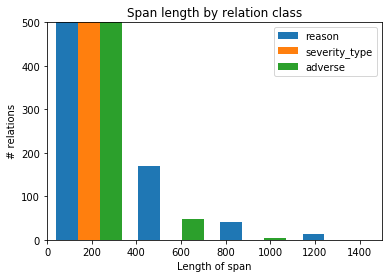

---reason---
Max span length: 2777
Min span length: 3
Mean span length: 127.69367588932806
Standard Devation span length: 176.05863228528833
---severity_type---
Max span length: 1873
Min span length: 4
Mean span length: 30.95886075949367
Standard Devation span length: 36.504484950303585
---adverse---
Max span length: 3686
Min span length: 4
Mean span length: 105.05715658021134
Standard Devation span length: 181.2484167321182


In [190]:
hist_spans_ecdf(relation_spans, ['reason', 'severity_type',
                                 'adverse'
                                ], 
               xlim=1500,
                ylim=500
               )

([array([ 536.,  243.,   76.,   25.,   12.,    4.,    7.,    2.,    0.,    1.]),
  array([  2.27100000e+03,   1.26600000e+03,   3.23000000e+02,
           2.77000000e+02,   2.44000000e+02,   2.80000000e+01,
           8.00000000e+00,   2.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([   5. ,   33.2,   61.4,   89.6,  117.8,  146. ,  174.2,  202.4,
         230.6,  258.8,  287. ]),
 <a list of 2 Lists of Patches objects>)

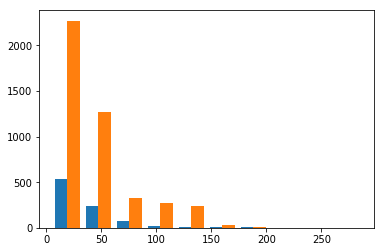

In [149]:
plt.hist([relation_spans['du'], relation_spans['fr']])

In [201]:
anno1_first = 0
anno2_second = 0
for doc in docs.values():
    for relat in doc.relations:
        if relat.annotation_1.span[0] < relat.annotation_2.span[0]:
            anno1_first += 1
        else:
            anno2_second += 1


In [202]:
anno1_first

14059

In [203]:
anno2_second

9106

In [56]:
# How many relations occur within a single sentence?

s_counts = defaultdict(int)
in_same = []
not_in_same = []

for doc in docs.values():
    for relat in doc.get_relations():
        num_sent = len(doc.get_sentences_overlap_span(relat.span))
        s_counts[num_sent] += 1
        if doc.in_same_sentence(relat.span):
            in_same.append(relat)
        else:
            not_in_same.append(relat)

In [57]:
s_counts

defaultdict(int,
            {1: 19307,
             2: 2430,
             3: 734,
             4: 295,
             5: 135,
             6: 85,
             7: 40,
             8: 35,
             9: 19,
             10: 14,
             11: 12,
             12: 15,
             13: 14,
             14: 8,
             15: 3,
             16: 1,
             17: 1,
             18: 2,
             20: 4,
             29: 1,
             33: 1,
             36: 1,
             44: 1,
             45: 1,
             46: 1,
             51: 1,
             53: 2,
             54: 1,
             84: 1})

In [5]:
not_in_same
for relat in not_in_same[:10]:
    
    doc = docs[relat.file_name]
    print(relat.file_name)
    print(relat)
    #print(doc.get_text_at_span(relat.span))
    print(doc.get_sentences_overlap_span(relat.span))
    
    #start, end = relat.span
    #print(doc.text[start:end])


10_1
'doxorubicin':'mantle cell lymphoma', Drug:Indication, type=reason
[['In', 'brief', ',', 'this', 'is', 'a', '68-year-old', 'male', 'recently', 'diagnosed', 'with', 'mantle', 'cell', 'lymphoma', ',', 'status', 'post', '2', 'cycles', 'of', 'hyper-CVAD', '.'], ['The', 'patient', 'was', 'admitted', 'from', 'home', 'on', 'the', 'specified', 'date', 'for', 'the', 'next', 'cycle', 'of', 'chemotherapy', '-hyper-CVAD-', 'with', 'an', 'extension', 'of', 'the', 'doxorubicin', 'infusion', '.']]
10_1
'neutropenia medication':'neutropenia', Drug:Indication, type=reason
[['DISPOSITION', ':', 'The', 'patient', 'is', 'being', 'discharged', 'in', 'good', 'condition', 'with', 'precautions', 'of', 'neutropenia', '.'], ['MEDICATIONS', 'ON', 'DISCHARGE', ':', 'The', 'patient', 'received', 'neutropenia', 'medication', 'and', 'is', 'being', 'discharged', 'on', 'Valtrex', '500', 'mg', '3', 'times', 'daily', ',', 'posaconazole', '200', 'mg', 'per', '5', 'mL', '3', 'times', 'daily', ',', 'ciprofloxacin', '5

Text(0.5,0,'In same sentence vs. not in same sentence')

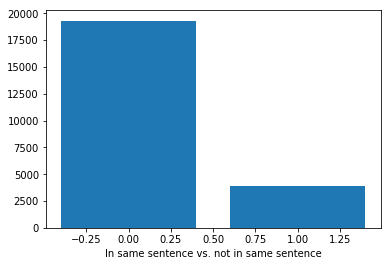

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar([0, 1], [len(in_same), len(not_in_same)])
plt.xlabel("In same sentence vs. not in same sentence")

In [11]:
overlapping_s = []
for relat in not_in_same:
    doc = docs[relat.file_name]
    span = relat.span
    overlapping_s.append((relat, doc.get_sentences_overlap_span(span)))

In [32]:
sent_counts = defaultdict(int)

for overlapped in overlapping_s:
    r, sents = overlapped
    num = len(sents)
    sent_counts[num] += 1

In [23]:
sent_counts

defaultdict(int,
            {2: 2430,
             3: 734,
             4: 295,
             5: 135,
             6: 85,
             7: 40,
             8: 35,
             9: 19,
             10: 14,
             11: 12,
             12: 15,
             13: 14,
             14: 8,
             15: 3,
             16: 1,
             17: 1,
             18: 2,
             20: 4,
             29: 1,
             33: 1,
             36: 1,
             44: 1,
             45: 1,
             46: 1,
             51: 1,
             53: 2,
             54: 1,
             84: 1})

In [25]:
sent_counts = sorted(sent_counts.items(), key=lambda x:x[1])

In [20]:
sents_overlapped = list(sorted(overlapping_s, key=lambda x:len(x[1]), reverse=True))

In [21]:
sents_overlapped[0]

('dialysate':'volume overload', Drug:ADE, type=adverse,
 [['He',
   'is',
   'currently',
   'on',
   'an',
   'automated',
   'cycler',
   'machine',
   'overnight',
   'at',
   'home',
   'using',
   '1.5',
   '%',
   'dialysate',
   'with',
   '2',
   'liters',
   'exchanges',
   'each',
   'time',
   'for',
   'four',
   'exchanges',
   '.'],
  ['His',
   'normal',
   'total',
   'therapy',
   'time',
   'is',
   'about',
   '8',
   'hours',
   '.'],
  ['He',
   'has',
   'told',
   'me',
   'that',
   'his',
   'peritoneal',
   'dialysis',
   'regimen',
   'was',
   'changed',
   'this',
   'week',
   'to',
   'mixed',
   '1.5',
   '%',
   'and',
   '2.5',
   '%',
   'dialysate',
   'for',
   'a',
   'couple',
   'of',
   'night',
   'due',
   'to',
   'volume',
   'overload',
   '.'],
  ['He',
   'had',
   'incomplete',
   'PD',
   'treatment',
   'last',
   'night',
   'before',
   'presenting',
   'to',
   'the',
   'hospital',
   '.'],
  ['He',
   'developed',
   'fever',
   '

In [10]:
num_relats = len(in_same) + len(not_in_same)
print(len(in_same)/num_relats)
print(len(not_in_same)/num_relats)

0.8334556442909562
0.16654435570904383


Text(0,0.5,'Number of relations')

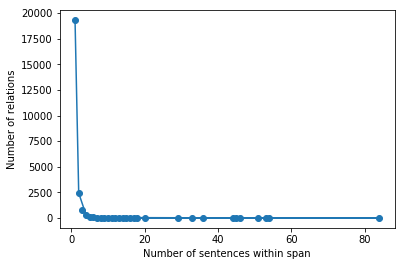

In [62]:
x, y = zip(*s_counts.items())
plt.plot(x, y, linestyle='-', marker='o')
plt.xlabel("Number of sentences within span")
plt.ylabel("Number of relations")

In [60]:
x_counts

NameError: name 'x_counts' is not defined

In [59]:
total_relats = sum(s_counts.values())
total_relats

23165

In [71]:
def prop_within_n(n):
    within_n = sum([x[1] for x in s_counts.items() if x[0] <= n])
    return within_n/total_relats

print("Number of relations in the same sentence: {}".format(prop_within_n(1)))
print("Number of relations within 2 sentences of each other: {}".format(prop_within_n(2)))
print("Number of relations within 3 sentences of each other: {}".format(prop_within_n(3)))
print("Number of relations within 5 sentences of each other: {}".format(prop_within_n(5)))
print("Number of relations within 10 sentences of each other: {}".format(prop_within_n(10)))
print("Number of relations within 25 sentences of each other: {}".format(prop_within_n(25)))
print("Number of relations within 84 sentences of each other: {}".format(prop_within_n(84)))

Number of relations in the same sentence: 0.8334556442909562
Number of relations within 2 sentences of each other: 0.9383552773580833
Number of relations within 3 sentences of each other: 0.9700410101446147
Number of relations within 5 sentences of each other: 0.9886034966544356
Number of relations within 10 sentences of each other: 0.9969350312972156
Number of relations within 25 sentences of each other: 0.9995251456939348
Number of relations within 84 sentences of each other: 1.0


In [16]:
docs['10_1014'].text

'--- Hospital ---  \n  \nPatient: --- Name ---, --- Name ---  \nDOV: --- Date --- \n  \nClinic Note  \n  \nDIAGNOSIS:  Mantle cell lymphoma status post unrelated donor stem cell transplant 102 days ago.  Recent pancytopenia of uncertain etiology.  \n  \nHISTORY OF PRESENT ILLNESS:  This is a 68 year old male with history of mantle cell lymphoma who is s/p MUD allogenic stem cell transplant who comes in for follow up exam.  Overall, he has been doing fairly well.  Denies any nausea, vomiting or diarrhea.  Denies any fever, chills, cough or shortness of breath.  He has been eating and drinking fairly well.  He has been maintaining his weight. He had recent pancytopenia of uncertain etiology.  \n  \nFAMILY HISTORY:  No change.  \n  \nSOCIAL HISTORY:  No change.  \n  \nREVIEW OF SYSTEMS:  Rest of the review of system is negative.  \n \nMEDICATIONS: Reviewed and updated in --- Company ---, of note he is on sirolimus 0.5mg every Monday and prednisone 20mg every other day \n  \nPHYSICAL EXAMI

In [48]:
# What do relations between the same classes look like?
from collections import defaultdict
same_types = defaultdict(list)

for doc in docs.values():
    for relat in doc.get_relations():
        if relat.entity_types[0] != relat.entity_types[1]:
            continue
        same_types[relat.entity_types[0]].append(relat)

In [50]:
for t in same_types.keys():
    print("TYPE: {}".format(t))
    for relat in same_types[t][:5]:
        doc = docs[relat.file_name]
        print(relat)
        print(doc.get_sentences_overlap_span(relat.span))
        print()
    print()
    print()

TYPE: Dose
'2 doses':'2 doses', Dose:Dose, type=do
[['He', 'also', 'received', '2', 'doses', 'of', 'rituximab', 'along', 'with', 'the', 'same', '.']]

'210 U':'ONE DOSE', Dose:Dose, type=do
[['TREATED', 'WITH', 'IVF', 'HYDRATION', ',', 'DIURESIS', ',', 'ONE', 'DOSE', 'CALCITONIN', '210', 'U', 'SQ', 'AND', 'PAMIDRONATE', '30MG', 'IV', 'X', '1', '.']]

'20 mg':'20 mg', Dose:Dose, type=do
[['He', 'is', 'on', 'with', 'OxyContin', '20', 'mg', 'every', '12', 'hours', 'and', 'Percocet', '5/325', '.']]

'20 mg tablets':'1 tablet', Dose:Dose, type=do
[['In', 'place', 'of', 'that', 'I', 'am', 'giving', 'him', 'oxycodone', '20', 'mg', 'tablets', 'that', 'he', 'could', 'take', '1', 'tablet', 'every', '3', 'hours', 'for', 'breakthrough', 'pain', ',', '#', '90', '.']]

'5/325':'5-6 tablets', Dose:Dose, type=do
[['He', 'reports', 'the', 'Percocet', 'he', 'is', 'taking', '5/325', 'anywhere', 'from', '5-6', 'tablets', 'per', 'day', '.']]



TYPE: Indication
'hypertension':'hypertension', Indication:Ind

## Feature Selection

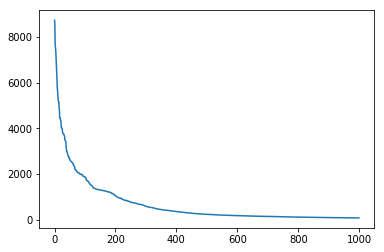

In [9]:
# Binary feature selection
import matplotlib.pyplot as plt
%matplotlib inline

scores = os.path.join('.', 'feature_extraction', 'binary_lex_feature_scores.txt')
with open(scores) as f:
    lines = f.read().splitlines()
    names, scores = zip(*[line.split('\t') for line in lines][:1000])
    scores = [float(s) for s in scores]
    

x = range(len(names))
#plt.plot(x, scores)

# With clusters
clusters = os.path.join('.', 'feature_extraction', 'binary_cluster_feature_scores.txt')
with open(clusters) as f:
    lines = f.read().splitlines()
    names, scores = zip(*[line.split('\t') for line in lines][:1000])
    scores = [float(s) for s in scores]
    
x = range(len(names))
plt.plot(x, scores)

In [99]:
#for i in range(100):
#    print(names[i], scores[i])

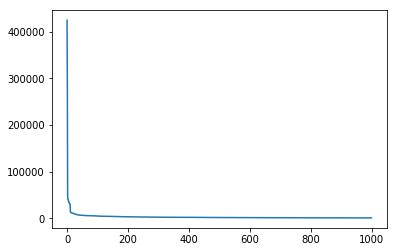

In [5]:
# Full model feature selection

scores = os.path.join('.', 'feature_extraction', 'full_lex_feature_scores.txt')
with open(scores) as f:
    lines = f.read().splitlines()
    names, scores = zip(*[line.split('\t') for line in lines][:1000])
    scores = [float(s) for s in scores]
    

x = range(len(names))
plt.plot(x, scores)

In [102]:
for fname, doc in docs.items():
    if "he does take about" in doc.text.lower():
        print(doc.file_name); break

1_1044


In [11]:
import os
os.listdir('data')

['annotated_document.txt',
 'annotated_documents.pkl',
 'binary_cluster_data.pkl',
 'binary_lexical_data.pkl',
 'data_lexical.pkl',
 'edge_counts.pkl',
 'filtered_data_lexical.pkl',
 'full_cluster_data.pkl',
 'full_lexical_data.pkl',
 'generated_train.pkl',
 'string_train.txt',
 'training_documents_and_relations.pkl',
 'validation_documents_and_relations.pkl',
 'vocab.pkl']

In [15]:
type(a)

sklearn.feature_extraction.dict_vectorizer.DictVectorizer

In [16]:
import os, sys
sys.path.append('.')
sys.path.append('feature_extraction')
lex_data = os.path.join('data', 'lex_feature_extractors.pkl')

from feature_extraction.lexical_features import LexicalFeatureExtractor

import pickle

with open(lex_data, 'rb') as f:
    feature_extractor, bin_selector, full_selector = pickle.load(f)
    


In [17]:
feature_extractor

LexicalFeatureExtractor Ngram Window: (1, 3) Vocab: 10154 terms

In [6]:
doc = list(docs.values())[0]

In [7]:
doc

[36 annotations, 18 relations]

In [19]:
relat = doc.get_relations()[0]

d = feature_extractor.create_feature_dict(relat, doc)

In [ ]:
bin_selector.transform([])

In [15]:
doc.get_tokens_at_span(relat.span)

['JJ', 'NN']

In [23]:
with open('./data/edge_counts.pkl', 'rb') as f:
    edges = pickle.load(f)

In [24]:
edges

defaultdict(int,
            {('ADE', 'ADE'): 0,
             ('ADE', 'Dose'): 0,
             ('ADE', 'Drug'): 0,
             ('ADE', 'Duration'): 0,
             ('ADE', 'Frequency'): 0,
             ('ADE', 'Indication'): 0,
             ('ADE', 'Route'): 0,
             ('ADE', 'SSLIF'): 0,
             ('ADE', 'Severity'): 282,
             ('Dose', 'ADE'): 0,
             ('Dose', 'Dose'): 0,
             ('Dose', 'Drug'): 0,
             ('Dose', 'Duration'): 0,
             ('Dose', 'Frequency'): 0,
             ('Dose', 'Indication'): 0,
             ('Dose', 'Route'): 0,
             ('Dose', 'SSLIF'): 0,
             ('Dose', 'Severity'): 0,
             ('Drug', 'ADE'): 2055,
             ('Drug', 'Dose'): 5150,
             ('Drug', 'Drug'): 0,
             ('Drug', 'Duration'): 901,
             ('Drug', 'Frequency'): 4407,
             ('Drug', 'Indication'): 4530,
             ('Drug', 'Route'): 2544,
             ('Drug', 'SSLIF'): 0,
             ('Drug', 'Severity')

In [25]:
edges = [x for x in edges.keys() if edges[x] >= 1]

In [26]:
edges

[('Drug', 'Route'),
 ('Drug', 'Indication'),
 ('SSLIF', 'Severity'),
 ('Drug', 'Dose'),
 ('Drug', 'Frequency'),
 ('Drug', 'Duration'),
 ('Drug', 'ADE'),
 ('ADE', 'Severity'),
 ('Indication', 'Severity'),
 ('SSLIF', 'ADE')]

In [12]:
docs = pickle.load()

60512

In [40]:
# How many times can a single Annotation be in the same relation type?
from collections import defaultdict
out_nodes = defaultdict(dict)
in_nodes = defaultdict(dict)

for r in relations:
    
    
    if r.type not in out_nodes:
        out_nodes[r.type] = defaultdict(int)
    if r.type not in in_nodes:
        in_nodes[r.type] = defaultdict(int)
    
    
    anno1, anno2 = r.get_annotations()
    out_nodes[r.type][anno1.id] += 1
    in_nodes[r.type][anno2.id] += 1
    
    


In [46]:
out_counts = {}
for r_type in out_nodes.keys():
    if r_type == 'none':
        continue
    if r_type not in out_counts:
            out_counts[r_type] = defaultdict(int)
    
    for anno_id, count in out_nodes[r_type].items():
        out_counts[r_type][count] += 1
    num_type = sum(out_counts[r_type].values())
    for count, value in out_counts[r_type].items():
        out_counts[r_type][count] = value/num_type
        
            

In [47]:
out_counts

{'adverse': defaultdict(int,
             {1: 0.7708978328173375,
              2: 0.16640866873065016,
              3: 0.048761609907120744,
              4: 0.008513931888544891,
              5: 0.0023219814241486067,
              8: 0.0030959752321981426}),
 'do': defaultdict(int,
             {1: 0.8356500408830744,
              2: 0.15153992913600436,
              3: 0.010902153175252113,
              4: 0.001635322976287817,
              5: 0.0002725538293813028}),
 'du': defaultdict(int, {1: 0.994475138121547, 2: 0.0055248618784530384}),
 'fr': defaultdict(int,
             {1: 0.9539473684210527,
              2: 0.04061784897025172,
              3: 0.004862700228832952,
              4: 0.0005720823798627002}),
 'manner/route': defaultdict(int,
             {1: 0.995274102079395, 2: 0.004725897920604915}),
 'reason': defaultdict(int,
             {1: 0.9187956204379562,
              2: 0.07238442822384428,
              3: 0.007907542579075427,
              4: 0.0009

In [48]:
in_counts = {}
for r_type in in_nodes.keys():
    if r_type == 'none':
        continue
    if r_type not in in_counts:
            in_counts[r_type] = defaultdict(int)
    for anno_id, count in in_nodes[r_type].items():
        in_counts[r_type][count] += 1
        
    num_type = sum(in_counts[r_type].values())
    for count, value in in_counts[r_type].items():
        in_counts[r_type][count] = value/num_type
        
            

In [49]:
in_counts

{'adverse': defaultdict(int,
             {1: 0.7710743801652893,
              2: 0.15619834710743802,
              3: 0.0256198347107438,
              4: 0.019834710743801654,
              5: 0.012396694214876033,
              6: 0.005785123966942148,
              7: 0.0024793388429752068,
              8: 0.003305785123966942,
              9: 0.003305785123966942}),
 'do': defaultdict(int,
             {1: 0.9333333333333333,
              2: 0.06493827160493827,
              3: 0.0017283950617283952}),
 'du': defaultdict(int,
             {1: 0.868421052631579,
              2: 0.07894736842105263,
              3: 0.039473684210526314,
              4: 0.013157894736842105}),
 'fr': defaultdict(int,
             {1: 0.9254913464359049,
              2: 0.0715752420064535,
              3: 0.0017600469345849222,
              4: 0.0008800234672924611,
              5: 0.0002933411557641537}),
 'manner/route': defaultdict(int,
             {1: 0.8711918760021379,
            

In [113]:
import made_utils
# Let's see how our predictions compare
pred_dir = './system/output2'
pred_reader = made_utils.TextAndBioCParser(pred_dir)
pred_docs = pred_reader.read_texts_and_xmls()

0/176
100/176


In [67]:
pred_docs

{}

In [106]:
pred_relations = []
for doc in pred_docs.values():
    pred_relations += doc.get_relations()

In [84]:
# How many times can a single Annotation be in the same relation type?
from collections import defaultdict
out_nodes = defaultdict(dict)
in_nodes = defaultdict(dict)

for r in pred_relations:
    
    if r.type not in out_nodes:
        out_nodes[r.type] = defaultdict(int)
    if r.type not in in_nodes:
        in_nodes[r.type] = defaultdict(int)
    
    
    anno1, anno2 = r.get_annotations()
    out_nodes[r.type][anno1.id] += 1
    in_nodes[r.type][anno2.id] += 1
    
    


In [85]:
out_counts = {}
for r_type in out_nodes.keys():
    if r_type == 'none':
        continue
    if r_type not in out_counts:
            out_counts[r_type] = defaultdict(int)
    for anno_id, count in out_nodes[r_type].items():
        out_counts[r_type][count] += 1
        
    num_type = sum(out_counts[r_type].values())
    for count, value in out_counts[r_type].items():
        out_counts[r_type][count] = value/num_type
        
            
            

{'adverse': defaultdict(int,
             {1: 0.7708978328173375,
              2: 0.16640866873065016,
              3: 0.048761609907120744,
              4: 0.008513931888544891,
              5: 0.0023219814241486067,
              8: 0.0030959752321981426}),
 'do': defaultdict(int,
             {1: 0.8356500408830744,
              2: 0.15153992913600436,
              3: 0.010902153175252113,
              4: 0.001635322976287817,
              5: 0.0002725538293813028}),
 'du': defaultdict(int, {1: 0.994475138121547, 2: 0.0055248618784530384}),
 'fr': defaultdict(int,
             {1: 0.9539473684210527,
              2: 0.04061784897025172,
              3: 0.004862700228832952,
              4: 0.0005720823798627002}),
 'manner/route': defaultdict(int,
             {1: 0.995274102079395, 2: 0.004725897920604915}),
 'reason': defaultdict(int,
             {1: 0.9187956204379562,
              2: 0.07238442822384428,
              3: 0.007907542579075427,
              4: 0.0009124087591240876}),
 'severity_type': defaultdict(int,
             {1: 0.9759124087591241,
              2: 0.023722627737226276,
              3: 0.000364963503649635})}

In [79]:
out_counts

{'adverse': defaultdict(int,
             {1: 0.8266666666666667, 2: 0.16533333333333333, 3: 0.008}),
 'do': defaultdict(int,
             {1: 0.8741976893453145,
              2: 0.11810012836970475,
              3: 0.006418485237483954,
              4: 0.0012836970474967907}),
 'du': defaultdict(int,
             {1: 0.8826530612244898,
              2: 0.11224489795918367,
              3: 0.00510204081632653}),
 'fr': defaultdict(int,
             {1: 0.9484126984126984,
              2: 0.04894179894179894,
              3: 0.0026455026455026454}),
 'manner/route': defaultdict(int,
             {1: 0.9825708061002179, 2: 0.017429193899782137}),
 'reason': defaultdict(int,
             {1: 0.8732747804265998,
              2: 0.10414052697616061,
              3: 0.02132998745294856,
              4: 0.0012547051442910915}),
 'severity_type': defaultdict(int,
             {1: 0.9436781609195403, 2: 0.05632183908045977})}

In [53]:
in_counts = {}
for r_type in in_nodes.keys():
    if r_type == 'none':
        continue
    if r_type not in in_counts:
            in_counts[r_type] = defaultdict(int)
    for anno_id, count in in_nodes[r_type].items():
        in_counts[r_type][count] += 1
        
    num_type = sum(in_counts[r_type].values())
    for count, value in in_counts[r_type].items():
        in_counts[r_type][count] = value/num_type
        
            
in_counts

{'adverse': defaultdict(int,
             {1: 0.7376425855513308,
              2: 0.21292775665399238,
              3: 0.015209125475285171,
              4: 0.0038022813688212928,
              5: 0.015209125475285171,
              7: 0.0038022813688212928,
              9: 0.011406844106463879}),
 'do': defaultdict(int, {1: 0.9671931956257594, 2: 0.032806804374240585}),
 'du': defaultdict(int,
             {1: 0.881578947368421,
              2: 0.07236842105263158,
              3: 0.039473684210526314,
              4: 0.006578947368421052}),
 'fr': defaultdict(int,
             {1: 0.9620786516853933,
              2: 0.03651685393258427,
              4: 0.0014044943820224719}),
 'manner/route': defaultdict(int,
             {1: 0.9292929292929293,
              2: 0.06818181818181818,
              3: 0.0025252525252525255}),
 'reason': defaultdict(int,
             {1: 0.7133956386292835,
              2: 0.1588785046728972,
              3: 0.07009345794392523,
            

0.0037333333333333333

In [56]:
len(docs)

700

In [86]:
# In truth documents, how many times can the same ENTITY (by text, not annotation) be connected with a different ENTITY?
# For example, how many times can be 'doxyrubin' and 'cancer' be connected?
# How many times can a single Annotation be in the same relation type?
from collections import defaultdict

counts = {}

for doc in docs.values():
    
    doc_counts = {}
    doc_relats = doc.get_relations()
    
    for r in doc_relats:
        if r.type not in doc_counts:
            doc_counts[r.type] = defaultdict(int)
    
        anno1, anno2 = r.get_annotations()
        concat = '{}:{}'.format(anno1.text, anno2.text)
        doc_counts[r.type][concat] += 1
        
        
    # Now aggregate
    for r_type in doc_counts.keys():
        for concat, edge_count in doc_counts[r_type].items():
            if r_type not in counts:
                counts[r_type] = defaultdict(int)
            counts[r_type][edge_count] += 1
        # Normalize
        num_type = sum(counts[r_type].values())
        for value, edge_count in counts[r_type].items():
            counts[r_type][value] = edge_count/num_type
    
    
    



In [87]:
# Truth
counts

{'adverse': defaultdict(int,
             {1: 0.9999996103005303,
              2: 3.8969946966902906e-07,
              3: 3.12295065373247e-86}),
 'do': defaultdict(int,
             {1: 0.9990842490842471,
              2: 8.241758241952864e-05,
              3: 0.0008333333333333333,
              4: 2.7634355436919524e-60}),
 'du': defaultdict(int,
             {1: 0.9498032407236856,
              2: 0.05019675927631434,
              3: 3.513903828119157e-50}),
 'fr': defaultdict(int,
             {1: 0.9989054081856021,
              2: 0.001092437106360783,
              3: 7.556586466430945e-17,
              4: 2.154708037060978e-06,
              5: 4.432509805122894e-161}),
 'manner/route': defaultdict(int,
             {1: 0.9956375406142408,
              2: 0.004362459269455191,
              3: 2.3260792412202976e-11,
              4: 6.478667429151012e-219,
              5: 9.30431696488119e-11,
              6: 4.525127806614674e-175}),
 'reason': defaultdict(int,
  

In [88]:
len(pred_docs)

176

In [ ]:
prednisone:every other day fr fr

In [114]:
# Let's look at predictions now
from collections import defaultdict

counts = {}

for doc in pred_docs.values():
    print(doc.file_name)
    doc_counts = {}
    doc_relats = doc.get_relations()
    
    for r in doc_relats:
        if r.type not in doc_counts:
            doc_counts[r.type] = defaultdict(int)
    
        anno1, anno2 = r.get_annotations()
        concat = '{}:{}'.format(anno1.text, anno2.text)
        doc_counts[r.type][concat] += 1
    
    for r_type in doc_counts.keys():
        i = 0
        for concat, value in doc_counts[r.type].items():
            
            i += 1
            if value > 1:
                
                print(i, doc.file_name, concat, value)
            
    # Now aggregate
    for r_type in doc_counts.keys():
        for concat, edge_count in doc_counts[r_type].items():
            if r_type not in counts:
                counts[r_type] = defaultdict(int)
            counts[r_type][edge_count] += 1
        # Normalize
        #num_type = sum(counts[r_type].values())
        #for value, edge_count in counts[r_type].items():
        #    counts[r_type][value] = edge_count/num_type
    
    
    
counts


10_1010
10_1012
10_1045
10_17
10_197
10_231
10_257
10_259
10_332
10_37
10_488
10_508
10_512
10_518
10_526
10_633
10_643
10_669
10_682
10_700
10_758
10_988
12_109
12_340
12_374
12_433
12_550
12_674
12_826
13_309
13_373
13_384
13_391
13_413
13_5
13_599
13_66
13_68
13_778
13_792
13_803
13_83
13_933
13_961
13_971
14_119
14_19
14_192
14_237
14_321
14_350
14_372
14_381
14_521
14_536
14_626
14_629
14_637
14_642
14_678
14_805
14_82
14_827
14_921
14_96
16_699
17_249
17_839
17_954
19_138
19_198
19_26
19_33
19_336
19_346
19_566
19_617
19_855
19_904
19_931
1_1004
1_1041
1_11
1_116
1_135
1_164
1_170
1_260
1_265
1_330
1_365
1_397
1_437
1_458
1_476
1_503
1_577
1_646
1_663
1_681
1_739
1_740
1_779
1_798
1_838
1_843
1_850
1_869
1_89
1_894
1_897
1_939
1_986
1_996
21_591
21_887
3_210
3_315
3_405
3_703
4_125
4_131
4_144
4_168
4_525
4_606
4_655
4_707
4_769
4_809
5_283
5_289
5_502
5_601
5_85
6_1011
6_1027
6_161
6_299
6_312
6_460
6_492
6_54
6_556
6_692
6_794
6_833
6_917
7_10
7_180
7_304
7_34
7_351
7_355
7_378

{'adverse': defaultdict(int, {1: 405}),
 'do': defaultdict(int, {1: 812}),
 'du': defaultdict(int, {1: 203}),
 'fr': defaultdict(int, {1: 738}),
 'manner/route': defaultdict(int, {1: 396}),
 'reason': defaultdict(int, {1: 842}),
 'severity_type': defaultdict(int, {1: 876})}

In [112]:
5 + 57 + 8 + 38 + 28 + 22 + 23

181

In [91]:
27 + 57 + 8 + 28 + 28 + 55 + 33

236

In [94]:
pred_relations = []
for d in pred_docs.values(): 
    pred_relations += d.get_relations()
236/len(pred_relations)

0.051248642779587406

# Truth
{'adverse': defaultdict(int,
             {1: 0.9999996103005303,
              2: 3.8969946966902906e-07,
              3: 3.12295065373247e-86}),
 'do': defaultdict(int,
             {1: 0.9990842490842471,
              2: 8.241758241952864e-05,
              3: 0.0008333333333333333,
              4: 2.7634355436919524e-60}),
 'du': defaultdict(int,
             {1: 0.9498032407236856,
              2: 0.05019675927631434,
              3: 3.513903828119157e-50}),
 'fr': defaultdict(int,
             {1: 0.9989054081856021,
              2: 0.001092437106360783,
              3: 7.556586466430945e-17,
              4: 2.154708037060978e-06,
              5: 4.432509805122894e-161}),
 'manner/route': defaultdict(int,
             {1: 0.9956375406142408,
              2: 0.004362459269455191,
              3: 2.3260792412202976e-11,
              4: 6.478667429151012e-219,
              5: 9.30431696488119e-11,
              6: 4.525127806614674e-175}),
 'reason': defaultdict(int,
             {1: 0.9687406968492903,
              2: 0.02084263648404298,
              3: 0.010416666666666666,
              4: 4.839564518113117e-17,
              5: 3.8748993381213453e-28}),
 'severity_type': defaultdict(int,
             {1: 0.9931110370122266,
              2: 0.005936582035392418,
              3: 0.0009523809523809524,
              4: 1.1956773152306327e-87})}

In [59]:
# did I keep the order?
a = [1, 2, 3]

In [60]:
a[0] = 'a'

In [61]:
a

['a', 2, 3]

In [62]:
a[4] = 'b'

IndexError: list assignment index out of range

In [63]:
a[3] = 'b'

IndexError: list assignment index out of range

In [121]:
?Counter

Init signature: Counter(*args, **kwds)
Docstring:     
Dict subclass for counting hashable items.  Sometimes called a bag
or multiset.  Elements are stored as dictionary keys and their counts
are stored as dictionary values.

>>> c = Counter('abcdeabcdabcaba')  # count elements from a string

>>> c.most_common(3)                # three most common elements
[('a', 5), ('b', 4), ('c', 3)]
>>> sorted(c)                       # list all unique elements
['a', 'b', 'c', 'd', 'e']
>>> ''.join(sorted(c.elements()))   # list elements with repetitions
'aaaaabbbbcccdde'
>>> sum(c.values())                 # total of all counts
15

>>> c['a']                          # count of letter 'a'
5
>>> for elem in 'shazam':           # update counts from an iterable
...     c[elem] += 1                # by adding 1 to each element's count
>>> c['a']                          # now there are seven 'a'
7
>>> del c['b']                      # remove all 'b'
>>> c['b']                          # now there are 

In [118]:
sent_lengths = []
# Let's look at sentence length
for rpt_id, doc in docs.items():
    for sent in doc._sentences.values():
        length = len(sent)
        sent_lengths.append(length)

In [122]:
from collections import Counter
counter = Counter(sent_lengths)

In [123]:
counter

Counter({1: 24,
         2: 4067,
         3: 523,
         4: 1721,
         5: 1986,
         6: 2706,
         7: 2869,
         8: 2420,
         9: 2380,
         10: 2375,
         11: 1912,
         12: 1637,
         13: 1700,
         14: 1413,
         15: 1435,
         16: 1326,
         17: 1061,
         18: 951,
         19: 934,
         20: 927,
         21: 730,
         22: 747,
         23: 645,
         24: 608,
         25: 567,
         26: 523,
         27: 362,
         28: 405,
         29: 313,
         30: 295,
         31: 243,
         32: 203,
         33: 211,
         34: 211,
         35: 140,
         36: 139,
         37: 116,
         38: 124,
         39: 92,
         40: 109,
         41: 77,
         42: 72,
         43: 59,
         44: 65,
         45: 67,
         46: 48,
         47: 60,
         48: 42,
         49: 29,
         50: 46,
         51: 36,
         52: 39,
         53: 43,
         54: 34,
         55: 40,
         56: 32,
    

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

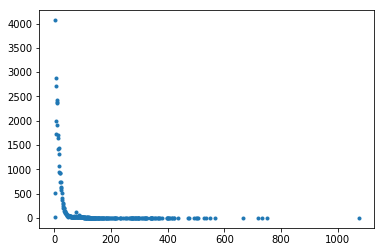

In [128]:
x,y = zip(*counter.items())
plt.plot(x, y, marker='.', linestyle='none')

(array([ 232.,    7.,    4.,    3.,    5.,    3.,    1.,    1.,    0.,    1.]),
 array([  1.00000000e+00,   4.07600000e+02,   8.14200000e+02,
          1.22080000e+03,   1.62740000e+03,   2.03400000e+03,
          2.44060000e+03,   2.84720000e+03,   3.25380000e+03,
          3.66040000e+03,   4.06700000e+03]),
 <a list of 10 Patch objects>)

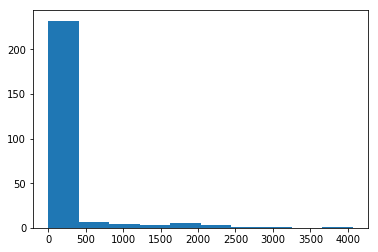

In [130]:
plt.hist(y)